<a href="https://colab.research.google.com/github/Amit32624/ml-basics_by-algorithms/blob/main/hyperparameter_tuning_pre_processingPipilines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')

--2021-11-13 07:38:07--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.007s  

2021-11-13 07:38:08 (6.63 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [3]:
bike_data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131


In [4]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

In [5]:
bike_data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2


In [6]:
numeric_features = ['temp','atemp','hum','windspeed']
categorical_features =['season','mnth','holiday','weekday','workingdat','weathersit','day']
bike_data[numeric_features +['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  ...       hum  windspeed  rentals  day
0        1  1/1/2011       1   0  ...  0.805833   0.160446      331    1
1        2  1/2/2011       1   0  ...  0.696087   0.248539      131    2
2        3  1/3/2011       1   0  ...  0.437273   0.248309      120    3
3        4  1/4/2011       1   0  ...  0.590435   0.160296      108    4
4        5  1/5/2011       1   0  ...  0.436957   0.186900       82    5

[5 rows x 15 columns]


In [7]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

In [8]:
#Splitting the data into train and train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
X_train.shape[0],X_test.shape[0],X_train.shape

(511, 220, (511, 10))

Now we're ready to train a model by fitting a boosting ensemble algorithm, as in our last notebook. Recall that a Gradient Boosting estimator, is like a Random Forest algorithm, but instead of building them all trees independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.Now we're ready to train a model by fitting a boosting ensemble algorithm, as in our last notebook. Recall that a Gradient Boosting estimator, is like a Random Forest algorithm, but instead of building them all trees independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE 104200.89075344456
RMSE 322.80162755699445
R2 0.7957206937053452


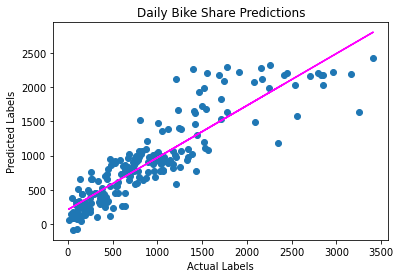

In [9]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
print(model,'\n')

# Evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)
r2 = r2_score(y_test,predictions)
print('R2',r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


## Hyperparameter tuning Example 1


The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. In the case of the GradientBoostingRegressor estimator, the algorithm is an ensemble that combines multiple decision trees to create an overall predictive model. You can learn about the hyperparameters for this estimator in the Scikit-Learn documentation.

Best parameter combination:  {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE 109088.91624344788
RMSE 330.2861127014696
R2 0.7861380265224789


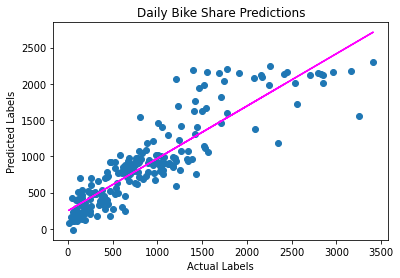

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Using a Gradient Boosting algo
algo = GradientBoostingRegressor()

# Hyperparamters to try
params = {
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,15]
}

# Finding the best hyperparameter combination to optimize the R2 scoe
score = make_scorer(r2_score)
gridsearch = GridSearchCV(algo,params,scoring=score,cv=4,return_train_score=True)
gridsearch.fit(X_train,y_train)
print("Best parameter combination: ",gridsearch.best_params_,'\n')

# Getting the best model
model = gridsearch.best_estimator_
print(model,'\n')

# Evualting the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)
r2 = r2_score(y_test,predictions)
print('R2',r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination:  {'alpha': 0.2, 'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(alpha=0.2, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE 108970.1840326088
RMSE 330.10632231541524
R2 0.7863707935697628


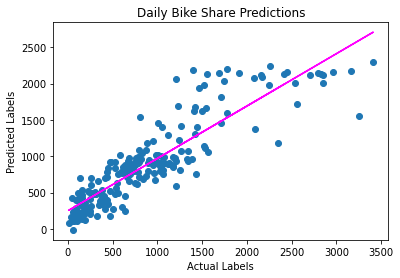

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Using a Gradient Boosting algo
algo = GradientBoostingRegressor()

# Hyperparamters to try
params = {
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,15],
    'alpha':[0.2,0.7,0.9]
}

# Finding the best hyperparameter combination to optimize the R2 scoe
score = make_scorer(r2_score)
gridsearch = GridSearchCV(algo,params,scoring=score,cv=4,return_train_score=True)
gridsearch.fit(X_train,y_train)
print("Best parameter combination: ",gridsearch.best_params_,'\n')

# Getting the best model
model = gridsearch.best_estimator_
print(model,'\n')

# Evualting the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)
r2 = r2_score(y_test,predictions)
print('R2',r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Demo of how to use Pre-processing pipelines

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Defining pre-processing for numeric columns
numeric_features =[6,7,8,9]
numeric_transformer = Pipeline(steps=[
                                      ('Scaler',StandardScaler())
])

# Defining pre-processing for categorical columns
categorical_features =[0,1,2,3,4,5]
categorical_tranformer = Pipeline(steps=[(
    'onehot',OneHotEncoder(handle_unknown='ignore')
)])

# Combining both pre-processing steps
preprocessor = ColumnTransformer(
    transformers =[
                   ('num',numeric_transformer,numeric_features),
                   ('cat',categorical_tranformer,categorical_features)
])

#Creating pr=processing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                                  ('regressor',GradientBoostingRegressor())
])


model = pipeline.fit(X_train,y_train)
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('Scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

MSE: 105269.8581021303
RMSE: 324.4531678102871
R2: 0.7936250503105314


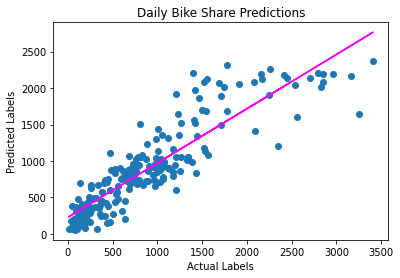

In [20]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Using the different eestimator


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('Scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

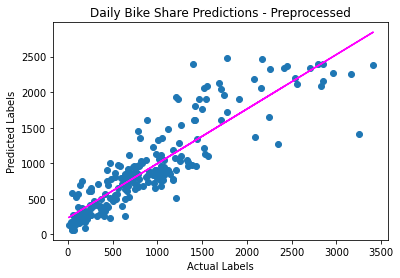

In [21]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [23]:
# Save the trained model
import joblib
filename='./bike-share.pkl'
joblib.dump(model,filename)

['./bike-share.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called scoring or inferencing.

In [25]:
loaded_model= joblib.load(filename)

X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]


In [28]:
result = loaded_model.predict(X_new)
print(result[0])

102.38


In [29]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
541.0
704.0
233.0
185.0
251.0


## Hyperparameter example 2 using GridSearch

In [34]:
# Generating the dataset
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=300,n_classes=2,n_features=10,n_redundant=0,random_state=23)

In [35]:
# Let's examine the data
X.shape,y.shape

((300, 10), (300,))

In [36]:
# Splitting the data into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
#Let's examine the trained data now
X_train.shape,y_train.shape

((240, 10), (240,))

In [38]:
# Let's build the simple machine learning model with Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

In [39]:
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rf.score(X_test,y_test)

0.8333333333333334

In [41]:
y_pred = rf.predict(X_test)

In [42]:
accuracy_score(y_pred,y_test)

0.8333333333333334

In [43]:
y_pred,y_test

(array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]))

**Hyperparameter tuning**

The GridSearchCV() function from scikit-learn will be used to perform the hyperparameter tuning. Particularly, GridSearchCV() function can perform the typical functions of a classifier such as fit, score and predict as well as predict_proba, decision_function, transform and inverse_transform.

Secondly, we define variables that are necessary input to the GridSearchCV() function.

In [52]:
from sklearn.model_selection import GridSearchCV
import numpy as np
 # define the parameters to be tuned

max_features_range = np.arange(1,6,1)
estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range,n_estimators=estimators_range)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)

In [53]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [56]:
grid.best_estimator_,grid.best_params_,grid.best_score_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=1,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=170,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 {'max_features': 1, 'n_estimators': 170},
 0.9)

**Dataframe of Grid search parameters and their Accuracy scores**


In [58]:
import pandas as pd
grid_results = pd.concat([pd.DataFrame(grid.cv_results_['params']),pd.DataFrame(grid.cv_results_['mean_test_score'],columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.833333
1,1,20,0.879167
2,1,30,0.862500
3,1,40,0.866667
4,1,50,0.879167


In [62]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.833333
             20            0.879167
             30            0.862500
             40            0.866667
             50            0.879167
...                             ...
5            160           0.887500
             170           0.883333
             180           0.887500
             190           0.883333
             200           0.891667

[100 rows x 1 columns]

In [63]:

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                      ...                              
n_estimators       10        20        30   ...       180       190       200
max_features                                ...                              
1             0.833333  0.879167  0.862500  ...  0.883333  0.887500  0.883333
2             0.883333  0.883333  0.883333  ...  0.891667  0.883333  0.887500
3             0.883333  0.887500  0.887500  ...  0.883333  0.891667  0.887500
4             0.879167  0.879167  0.879167  ...  0.887500  0.883333  0.883333
5             0.879167  0.883333  0.887500  ...  0.887500  0.883333  0.891667

[5 rows x 20 columns]

In [64]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

**2D CONTOUR PLOT**

In [65]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()